In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import standard_normal, normal, multivariate_normal

In [4]:
# les juniors
mu1=np.array([1000,28])
sigma1=np.array([[5,0],[0,10]])
juniors=multivariate_normal(mean=mu1,cov=sigma1,size=500)

In [5]:
# les seniors
mu2=np.array([5000,55])
sigma2=np.array([[100,0],[0,2]])
seniors=multivariate_normal(mean=mu2,cov=sigma2,size=50) 

Text(0.5, 1.0, 'Population des employés')

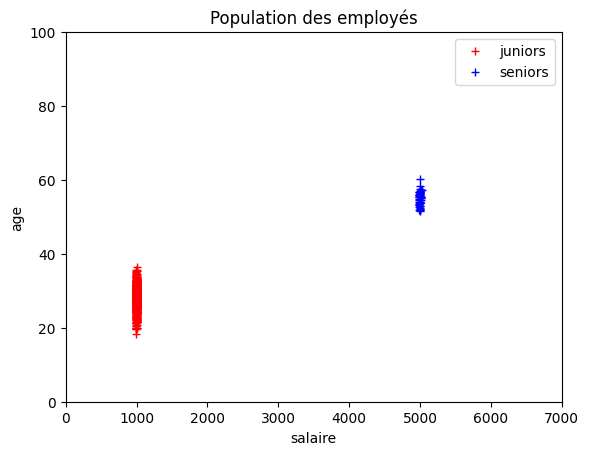

In [6]:
plt.plot(juniors[:,0],juniors[:,1],'r+', label='juniors')
plt.plot(seniors[:,0],seniors[:,1],'b+', label='seniors')
plt.xlabel('salaire')
plt.ylabel('age')
plt.xlim([0,7000])
plt.ylim([0,100])
plt.legend()
plt.title('Population des employés')

Kmeans

In [7]:
#calculer la moyenne arithmétique des salaires des juniors et des seniors 
#et la moyenne arithmétique des âges des juniors et des seniors
mu_seniors=np.mean(seniors,axis=0)
mu_juniors=np.mean(juniors,axis=0) #axis=0 pour calculer la moyenne sur les lignes
print('moyenne salaire seniors',mu_seniors[0])
print('moyenne salaire juniors',mu_juniors[0])

moyenne salaire seniors 4999.135837094275
moyenne salaire juniors 999.9577200095268


In [8]:
requete=np.array([4500,46])
#calculer la distance euclidienne entre la requête et les juniors et les seniors
dist_seniors=np.linalg.norm(requete-mu_seniors) # norme euclidienne
dist_juniors=np.linalg.norm(requete-mu_juniors)
print('distance seniors',dist_seniors)
print('distance juniors',dist_juniors)

distance seniors 499.2181539412301
distance juniors 3500.0879564632055


---

Knn

In [10]:
#concatiner les juniors et les seniors dans une matrice X 
X=np.vstack((juniors,seniors))
X

array([[ 997.98926334,   30.56955208],
       [ 999.73882696,   28.64793435],
       [ 997.67426558,   26.74922021],
       ...,
       [4987.72410742,   55.99539716],
       [4999.2246031 ,   56.42636553],
       [4984.00426944,   53.56015245]])

In [12]:
#génerer un vecteur labels de taille égalent à la taille de X
#contenant des 1 pour les juniors et des 2 pour les seniors 
labels=np.hstack((np.ones(juniors.shape[0]),2*np.ones(seniors.shape[0])))


In [15]:
#calculer la distance euclidienne entre la requête et les individus de X
dist=np.linalg.norm(X-requete,axis=1) #axis=1 pour calculer la norme sur les colonnes
dist


In [21]:
#trier les distances et les labels en fonction des distances
dist,labels=zip(*sorted(zip(dist,labels)))
dist,labels=np.array(dist),np.array(labels)
dist,labels


(array([3500.30418302, 3501.95824662, 3502.04473107, 3502.37864065,
        3502.62997414]),
 array([2., 2., 2., 2., 2.]))

In [23]:
#trouver les 5 plus proches voisins
labels=np.array(labels[:5])
labels

array([2., 2., 2., 2., 2.])

In [25]:
#trouver le plus grand nombre de labels
from collections import Counter
Counter(labels).most_common(1)[0][0] 


2.0

---

gmm Sol°3

In [89]:
#estimer la loi gaussienne(mu,sigma) de chaque classe à partir des données d'entrainement
from scipy.stats import multivariate_normal
G_juniors=multivariate_normal(mean=mu_juniors,cov=sigma1)
G_seniors=multivariate_normal(mean=mu_seniors,cov=sigma2)

#calculer la probabilité de la requête pour chaque classe
p_juniors=G_juniors.pdf(requete)
p_seniors=G_seniors.pdf(requete)


In [94]:
#calcule de moyenne arithmétique 
mu=np.mean(X,axis=0)
#calcule de la matrice de covariance
sigma=np.cov(X.T)

#estimation de la loi gaussienne
G=multivariate_normal(mean=mu,cov=sigma)
G.pdf(X)




array([3.08275109e-05, 4.14664801e-05, 3.82823451e-05, 3.32703887e-05,
       6.19771843e-06, 2.65720277e-05, 4.63233848e-06, 4.20043889e-05,
       3.51694351e-05, 4.10270004e-05, 3.96949433e-05, 4.02197110e-05,
       4.16470341e-05, 2.34696444e-05, 3.47629265e-05, 2.62993191e-05,
       1.95476293e-05, 2.46182977e-05, 4.05370301e-05, 1.36763859e-05,
       1.91781752e-05, 1.04469529e-05, 4.20429147e-05, 1.73309356e-05,
       3.48398540e-05, 3.90609288e-05, 2.24464461e-05, 2.11716180e-05,
       3.43686835e-05, 3.89197012e-05, 1.38962348e-06, 4.12263073e-05,
       3.73506665e-05, 3.12718525e-05, 2.51451064e-05, 3.70490085e-05,
       4.17872566e-05, 3.67376565e-05, 2.50304392e-05, 2.57062988e-06,
       1.40567322e-05, 3.85886323e-05, 1.37224792e-05, 3.77799871e-05,
       1.78241591e-05, 3.61436853e-05, 3.86787155e-05, 1.93551447e-05,
       2.27048866e-05, 1.97961268e-05, 2.62020999e-05, 4.20648693e-05,
       3.60655016e-05, 4.02503108e-05, 3.79061038e-05, 1.30543772e-06,
      

In [99]:
#calculer la vraisemblance de la requête dans chaque classe
p_juniors=G_juniors.pdf(requete)
p_seniors=G_seniors.pdf(requete)
print('p_juniors',p_juniors)
print('p_seniors',p_seniors)

p_juniors 0.0
p_seniors 0.0


In [77]:
#calculer la probabilité a priori de chaque classe 
#probabilité a priori des seniors
p_priori_seniors=seniors.shape[0]/X.shape[0] #shape[0] pour avoir le nombre de lignes
#probabilité a priori des juniors
p_priori_juniors=juniors.shape[0]/X.shape[0]
print('probabilité a priori seniors',p_priori_seniors)
print('probabilité a priori juniors',p_priori_juniors)

probabilité a priori seniors 0.09090909090909091
probabilité a priori juniors 0.9090909090909091


In [101]:
#selon la théoreme de bayes calculer la probabilité a posteriori de la requête pour chaque classe 
#probabilité a posteriori des seniors
p_posteriori_seniors=p_seniors*p_priori_seniors
#probabilité a posteriori des juniorsa
p_posteriori_juniors=p_juniors*p_priori_juniors
print('probabilité a posteriori seniors',p_posteriori_seniors)
print('probabilité a posteriori juniors',p_posteriori_juniors)

    



probabilité a posteriori seniors 0.0
probabilité a posteriori juniors 0.0
juniors
